In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [34]:
sns.set_palette('hls')

In [35]:
full_df = pd.read_csv('data/train.csv')

In [48]:
test_df = pd.read_csv('data/test.csv')

In [36]:
full_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [37]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


C:\Users\cozie\AppData\Local\Temp\ipykernel_19892\3971794896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x='target', data=full_df, palette='hls')


Text(0.5, 0, 'Label')

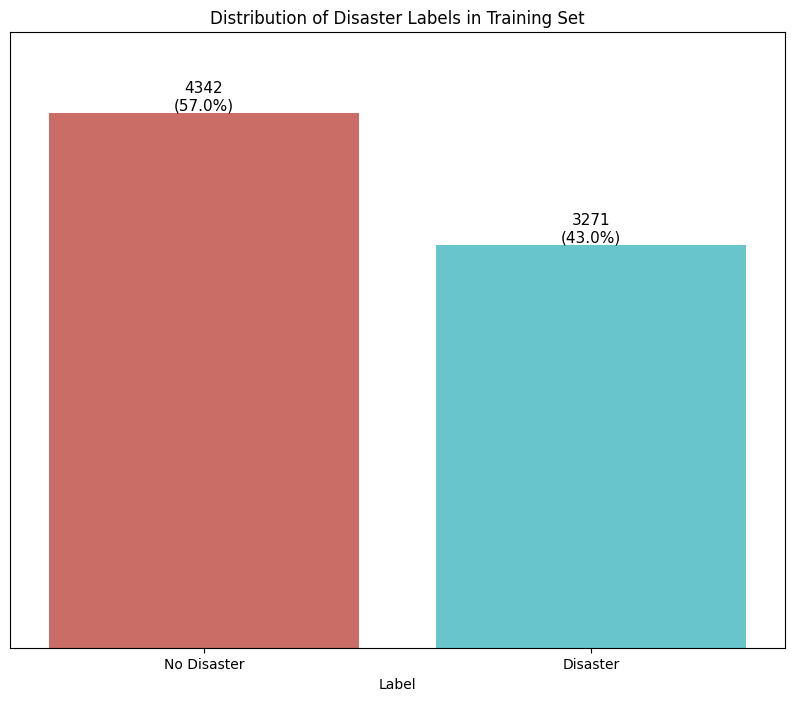

In [38]:

plt.figure(figsize=(10, 8))
bars = sns.countplot(x='target', data=full_df, palette='hls')
total = len(full_df)
for bar in bars.patches:
    height = bar.get_height()
    percentage = 100 * height / total
    bars.annotate(f'{height:0.0f}\n({percentage:.1f}%)',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom', fontsize=11)
plt.xticks(ticks=[0, 1], labels=['No Disaster', 'Disaster'])
plt.ylim(0,5000)
plt.ylabel('')
plt.yticks([])
plt.title('Distribution of Disaster Labels in Training Set')
plt.xlabel('Label')

In [39]:
train_df, val_df = train_test_split(full_df, test_size=0.2, random_state=42, stratify=full_df['target'])

By inspecting the locations of the tweets, we see that there is no concrete convention for the location of the tweets. Some tweets have precise locations such as cities, other are more general such as countries or states, and some tweets have no location at all.

Text(0.5, 1.0, 'Top 20 Locations of Tweets')

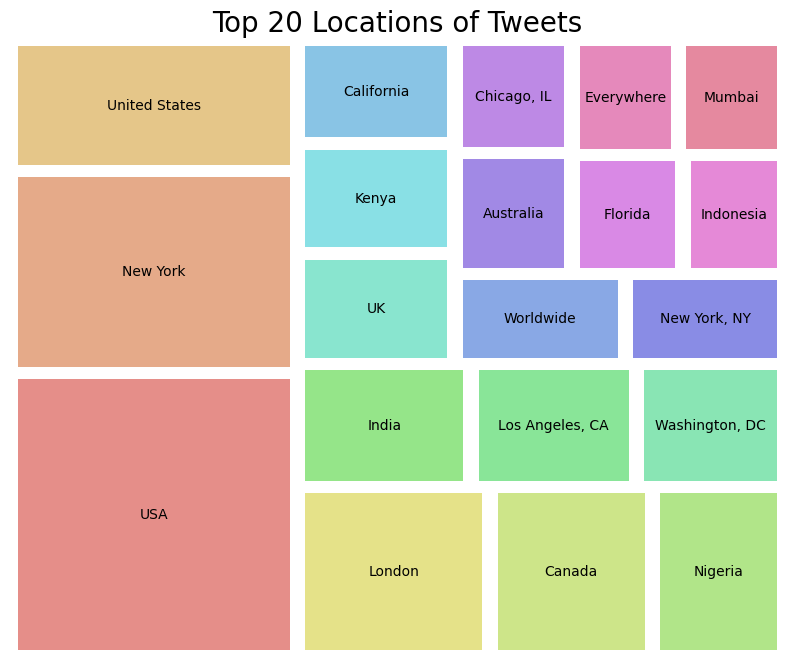

In [40]:
tmp = train_df['location'].value_counts().head(20)
plt.figure(figsize=(10, 8))
plt.axis('off')
axis = squarify.plot(sizes=tmp.values, label=tmp.index, alpha=.7, color = sns.color_palette("hls", 20), pad=1)
axis.set_title("Top 20 Locations of Tweets", fontsize=20)

The distribution of the lenghts of the tweets is shown below. Most tweets have around 135 characters. There is no distrbution difference between disaster and non-disaster tweets

<Axes: xlabel='text_len', ylabel='Count'>

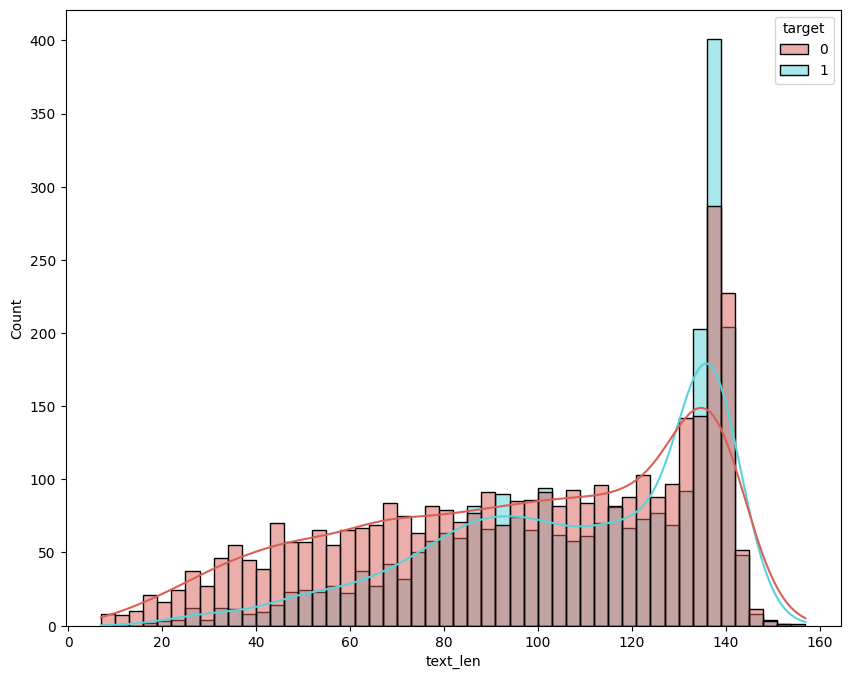

In [41]:
train_df['text_len'] = train_df['text'].str.len()

plt.figure(figsize=(10, 8))
sns.histplot(x='text_len', data=train_df, bins=50, kde=True, hue='target', palette='hls')

C:\Users\cozie\AppData\Local\Temp\ipykernel_19892\3426966840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tmp.values, y=tmp.index, palette=colors, orient='h')


Text(0.5, 1.0, 'Top 20 Keywords of Tweets')

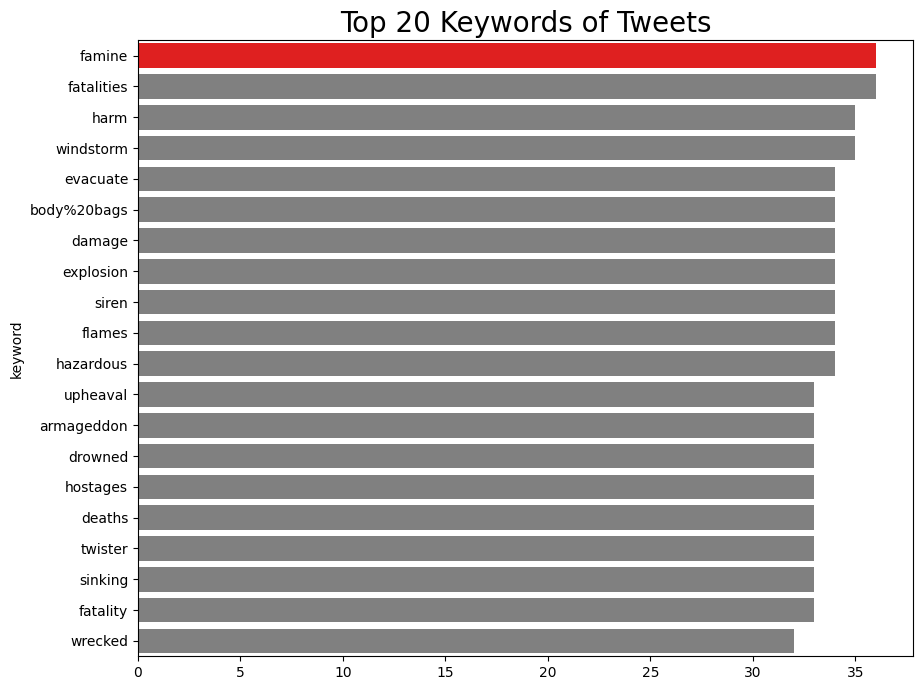

In [42]:
tmp = train_df['keyword'].value_counts().head(20)
colors = ['red' if i==0 else 'gray' for i in range(len(tmp.index)) ]
plt.figure(figsize=(10, 8))
sns.barplot(x=tmp.values, y=tmp.index, palette=colors, orient='h')
plt.title("Top 20 Keywords of Tweets", fontsize=20)

In [43]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X = vectorizer.fit_transform(train_df['text'])
y = train_df['target']

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [44]:
X_val = vectorizer.transform(val_df['text'])
y_pred = model.predict(X_val)

print(classification_report(val_df['target'], y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       869
           1       0.76      0.77      0.76       654

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [49]:
X = vectorizer.fit_transform(full_df['text'])
y = full_df['target']

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X, y)

X_test = vectorizer.transform(test_df['text'])
y_pred = model.predict(X_test)

test_df['target'] = y_pred
test_df[['id', 'target']].to_csv('data/submission.csv', index=False)

In [51]:
!kaggle competitions submit -c nlp-getting-started -f data/submission.csv -m "Baseline with Logistic Regression and TF-IDF"

Successfully submitted to Natural Language Processing with Disaster Tweets



  0%|          | 0.00/25.4k [00:00<?, ?B/s]
 63%|██████▎   | 16.0k/25.4k [00:00<00:00, 20.7kB/s]
100%|██████████| 25.4k/25.4k [00:01<00:00, 22.2kB/s]
